In [12]:
# Import packages
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pylab
import mahotas as mh
import cv2

In [13]:
from Functions import create_dirs, mask_seg, count_animals,smooth_animals, get_centers, get_bboxes,write_file

In [14]:
# Create the data directories
create_dirs()

Creation of the directory ../Data/images/2019-10 failed
Creation of the directory ../Data/labels/2019-10 failed
Creation of the directory ../Data/semantic/2019-10 failed


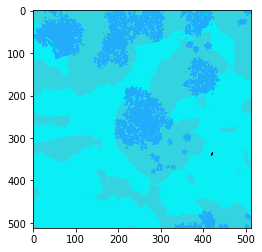

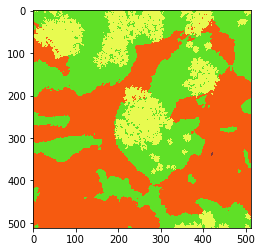

In [25]:
# Mask function
image_name = "IMG9_40,10_.png"
input_location = "../Data/images/2019-10/"
input_location_s = "../Data/semantic/2019-10/"

input_image = input_location + image_name
input_image_s = input_location_s + image_name

#"Data/semantic/2019-10/IMG107_400,0_.png"
animals, mask = mask_seg(input_image_s)
img = mpimg.imread(input_image_s)
imgplot = plt.imshow(img)

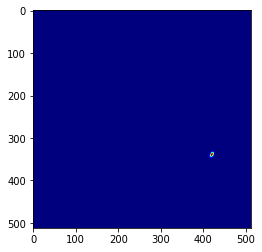

In [26]:
#Height 60m = sigma 2
sigma = 2

animalsf,T = smooth_animals(animals,sigma = sigma)

This image contains  1 animals


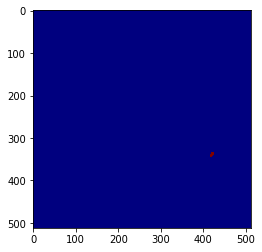

In [27]:
labeled_animals, nr_objects = count_animals(animalsf,T)

In [18]:
# 1. write function for centers
# 2. write function for bboxes 
# 3. save all information in the right spot
# 4. automnate so all information is in the right spot if imput images are inputted in a list of something

#Make a warning if number of centers does not coincide with number of animals counted, one animal gets two centers probably
#Write function to choose middle of centers if  this is the case, i.e. two are superduper close together

In [28]:
centers_list = get_centers(animalsf)
print(centers_list)

nr centers 2
[(0.8203125, 0.662109375), (0.818359375, 0.6640625)]


In [29]:
bbox_list = get_bboxes(labeled_animals)
print(bbox_list)

[(0.015625, 0.0234375)]


In [30]:
# write file x y width height


In [31]:
output_location = "../Data/labels/2019-10/"

write_file(output_location,image_name,centers_list,bbox_list)

In [23]:
#pylab experiment
x = test_image_s
pylab.imshow(x)
print (x.shape)
print (x.dtype)
print (x.max())
print (x.min())
print(x[0])

# colour values
Yellow_tree = [0.9098039  0.98039216 0.3137255  1.        ]
Green_ground = [0.37254903 0.8784314  0.15294118 1.        ]

SyntaxError: invalid syntax (<ipython-input-23-32ceffe67481>, line 11)